In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os
import random
import pandas as pd
from collections import Counter
np.random.seed(1234)

In [2]:
import tqdm
from utils import ThousandLandmarksDataset, ScaleMinSideToSize, CropCenter, TransformByKeys, CROP_SIZE
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
import seaborn as sns

In [4]:
train_path = './data/train/images/'
test_path = './data/test/images/'
train_img_names = [os.path.join(train_path, name) for name in os.listdir(train_path)]
test_img_names = [os.path.join(test_path, name) for name in os.listdir(test_path)]

In [3]:
train_transforms = transforms.Compose([
    ScaleMinSideToSize((CROP_SIZE, CROP_SIZE)),
    CropCenter(CROP_SIZE),
])

In [4]:
with open('bad_images.bd') as fin:
    bad_img_names = fin.readlines()
    bad_img_names = [i.strip() for i in bad_img_names]
train_dataset = ThousandLandmarksDataset('data/train', train_transforms, split="train",
                                         bad_img_names=bad_img_names)
train_dataloader = DataLoader(train_dataset, batch_size=512, num_workers=4, pin_memory=True,
                              shuffle=True, drop_last=False)

test_dataset = ThousandLandmarksDataset('data/test', train_transforms, split="test")
test_dataloader = DataLoader(test_dataset, batch_size=512, num_workers=4, pin_memory=True,
                              shuffle=True, drop_last=False)

100%|██████████| 16001/16001 [00:00<00:00, 576349.85it/s]


In [5]:
def count_hist(dataloader, batch_size=32):
    bgr_stat = [[] for _ in range(3)]
    for batch in tqdm.tqdm(dataloader):
        imgs = batch['image']
        
        red_values = [np.mean(img[:, :, 0].numpy()) for img in imgs]
        green_values = [np.mean(img[:, :, 1].numpy()) for img in imgs]
        blue_values = [np.mean(img[:, :, 2].numpy()) for img in imgs]
        
        bgr_stat[0].extend(blue_values)
        bgr_stat[1].extend(green_values)
        bgr_stat[2].extend(red_values)
    return bgr_stat

In [6]:
train_rgb = count_hist(train_dataloader, batch_size=512)
test_rgb = count_hist(test_dataloader, batch_size=512)

100%|██████████| 100/100 [00:20<00:00,  4.94it/s]


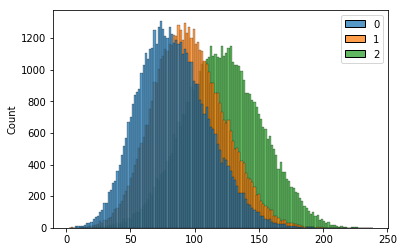

In [8]:
sns.histplot(train_rgb)

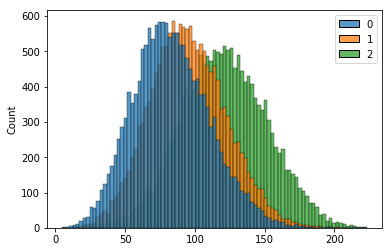

In [10]:
sns.histplot(test_rgb)